In [121]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [122]:
bias=300
X, y, coef=make_regression( n_features=1, bias=bias, random_state=42, coef=True, noise=15)

In [123]:
X.shape, y.shape

((100, 1), (100,))

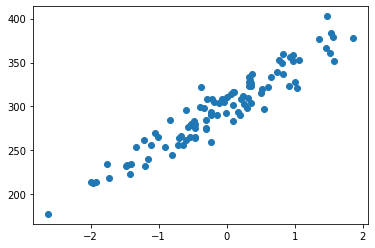

In [124]:
plt.scatter(X, y)
# plt.plot(X,y)

In [125]:
coef, bias, model.coef_

(array(41.74110031), 300, 3.8108004208077557)

In [126]:
y_gen= X * coef + bias

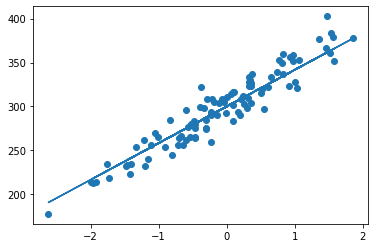

In [127]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
model = LinearRegression()

In [130]:
model.fit(X, y)

LinearRegression()

In [131]:
model.coef_, model.intercept_

(array([45.78520483]), 301.74767298079047)

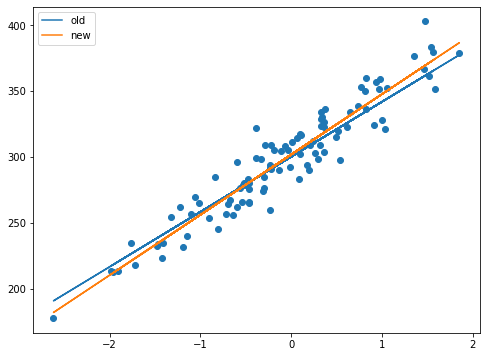

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, y_gen, label="old")
plt.plot(X, model.predict(X), label="new")
plt.legend()


In [133]:
class LinearRegCustom:
    def __init__(self, lr=0.1):
        self.lr = lr
        
    def fit(self, X, y):
        self._X=X
        self._y=y.reshape(-1,1)
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        error=[]
        for i in range(50):
            self.gradient_decent()
            error.append(self.error())
        return error
    def gradient_decent(self):
        d_coef, d_intercept = self.gredient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
        
        
    def gredient(self):
        yh=self.predict(self._X)
        d_coef=((yh-self._y)*self._X).mean()
        d_intercept = (yh-self._y)
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

In [134]:
model=LinearRegCustom(lr=.1)
bias=300
X, Y, coef = make_regression(n_features=1, bias=bias, random_state=42, coef=True, noise=15)

In [135]:
error = model.fit(X, Y)

In [136]:
coef

array(41.74110031)

In [137]:
# model.coef_, model.intercept_

In [138]:
# class LinearRegCustom2:
#     # constructor
#     def __init__(self, lr=0.1):
#         self.lr = lr
    
#     # training function i.e. fit
#     def fit(self, X, y):
#         self._X = X # _X mock behavior like private
#         self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
#         # need to figure out value of coef & intercept
#         # step 1: pick these values at random 
#         self.coef_ = np.random.random()
#         self.intercept_ = np.random.random()
        
#         # gradient descent
#         errors = []
        
#         # lets say we do this 50 times
#         for i in range(50):
#             self.gradient_decend()
#             errors.append(self.error())
#         return errors
    
#     def gradient_decend(self):
#         # change in coef and intercept
#         d_coef, d_intercept = self.gradient()
#         self.coef_ -= d_coef * self.lr
#         self.intercept_ -= d_intercept * self.lr
    
#     def gradient(self):
#         yh = self.predict(self._X) # from predict funtion
        
#         d_coef = ((yh - self._y) * self._X).mean()
#         d_intercept = (yh - self._y).mean()
        
#         return d_coef, d_intercept
    
#     def predict(self, X):
#         return X * self.coef_ + self.intercept_
    
#     def error(self):
#         return ((self.predict(self._X) - self._y) ** 2).sum()
